In [1]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


train= pd.read_csv('C:/Users/roger/Documents/DMT/2/training_set_VU_DM_2014.csv')
test= pd.read_csv('C:/Users/roger/Documents/DMT/2/test_set_VU_DM_2014.csv')

In [ ]:
#haven't ereased them because maybe they might be usefull I don't know ¯\_(ツ)_/¯

In [6]:
#randomForestIntro
from sklearn.ensemble import RandomForestClassifier

#X = [[ 4958347, 54], [1, 1]]
#Y = [4959183, 50]
#clf = RandomForestClassifier(n_estimators=10)
#clf = clf.fit(X, Y)

In [ ]:
#X = train.drop(['booking_bool', 'date_time', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff','comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff','comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff','comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff','comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'  ], axis=1)
#X = X.fillna(train.mean())
#Y = train['booking_bool']

In [ ]:
#decision treea
#X, y = make_blobs(n_samples=4958347, n_features=54, centers=90000, random_state=0) 
#clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
#scores = cross_val_score(clf, X, Y)
#scores.mean()
#X = X.sample(frac=0.1, replace=True)
#Y = X['booking_bool']

In [43]:
#sampling attempt
#train = train.drop(['booking_bool', 'date_time', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff','comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff','comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff','comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff','comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'  ], axis=1)
#train = train.sample(frac=0.1, replace=True)


In [ ]:
#clf = ExtraTreesClassifier(n_estimators=64, max_depth=None,min_samples_split=2, random_state=-1)
#scores = cross_val_score(clf, X, y)

In [40]:
#EVERYBODY CALM THE FUCK DOWN
sample = train.sample(frac=0.1, replace=True) #sampling

In [45]:
c.value_counts() 

0    482072
1     13763
Name: booking_bool, dtype: int64

In [46]:
a=sample.drop(['srch_id','booking_bool', 'date_time', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff','comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff','comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff','comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff','comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'  ], axis=1)
b=a.mean()
a = a.fillna(a.mean())
c = sample['booking_bool']
X = a
Y = c


ValueError: labels ['srch_id' 'booking_bool' 'date_time' 'orig_destination_distance'
 'comp1_rate' 'comp1_inv' 'comp1_rate_percent_diff' 'comp2_rate'
 'comp2_inv' 'comp2_rate_percent_diff' 'comp3_rate' 'comp3_inv'
 'comp3_rate_percent_diff' 'comp4_rate' 'comp4_inv'
 'comp4_rate_percent_diff' 'comp5_rate' 'comp5_inv'
 'comp5_rate_percent_diff' 'comp6_rate' 'comp6_inv'
 'comp6_rate_percent_diff' 'comp7_rate' 'comp7_inv'
 'comp7_rate_percent_diff' 'comp8_rate' 'comp8_inv'
 'comp8_rate_percent_diff'] not contained in axis

In [ ]:
#defining our pretty variables 
#X = sample.drop(['booking_bool', 'date_time', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff','comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff','comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff','comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff','comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'  ], axis=1)
#X = X.fillna(sample.mean())
#Y = sample['booking_bool']

In [47]:
#X.max()

In [48]:
#tree
#clf = ExtraTreesClassifier(n_estimators=64, max_depth=None,min_samples_split=2, random_state=-1)

In [49]:
#scores
#scores = cross_val_score(clf, X, Y)

In [30]:
#k,k let's try this
import numpy as np

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

#being extra
l=X.columns

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print(l[f])

Feature ranking:
1. feature 24 (0.644798)
site_id
2. feature 25 (0.115978)
visitor_location_country_id
3. feature 23 (0.096467)
visitor_hist_starrating
4. feature 12 (0.018237)
visitor_hist_adr_usd
5. feature 16 (0.010618)
prop_country_id
6. feature 13 (0.009329)
prop_id
7. feature 17 (0.009154)
prop_starrating
8. feature 10 (0.008887)
prop_review_score
9. feature 9 (0.008320)
prop_brand_bool
10. feature 11 (0.008010)
prop_location_score1
11. feature 5 (0.007934)
prop_location_score2
12. feature 15 (0.007905)
prop_log_historical_price
13. feature 7 (0.006807)
position
14. feature 6 (0.005611)
price_usd
15. feature 18 (0.005608)
promotion_flag
16. feature 4 (0.005225)
srch_destination_id
17. feature 0 (0.005096)
srch_length_of_stay
18. feature 1 (0.005090)
srch_booking_window
19. feature 19 (0.004559)
srch_adults_count
20. feature 21 (0.003168)
srch_children_count
21. feature 22 (0.002712)
srch_room_count
22. feature 20 (0.002705)
srch_saturday_night_bool
23. feature 14 (0.002506)
srch_

In [28]:
#getting comfy with columns and stuff 
l=X.columns
l[25]

#Daniel magic that didn't worked
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print(X[indices[f]])

'gross_bookings_usd'

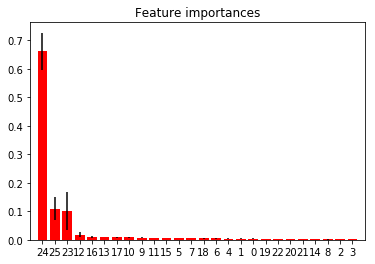

In [52]:
#featurenumbergraph
import matplotlib.pyplot as plt

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

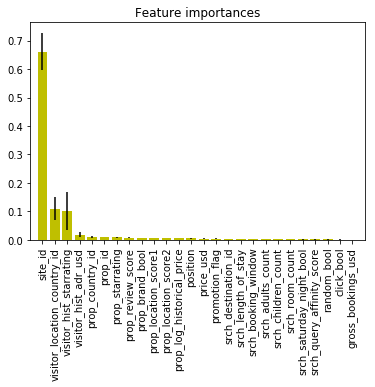

In [75]:
#take 2 
#feature_names = x_dummies.columns
feature_names=X.columns

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="y", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names)
plt.xticks(rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [31]:
X.shape

(495835, 26)

In [57]:
#the whole thing
#a=sample.drop(['srch_id','booking_bool', 'date_time', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff','comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff','comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff','comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff','comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'  ], axis=1)
#b=a.mean()
#a = a.fillna(a.mean())
#c = sample['booking_bool']
#X = a
#Y = c

Y = train['booking_bool']
train = train.drop(['srch_id','booking_bool', 'date_time', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff','comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff','comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff','comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff','comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'  ], axis=1)
train = train.fillna(train.mean())
X = train

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

#being extra
l=X.columns

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print(l[f])


KeyError: 'booking_bool'

In [83]:
#aimin a little high now:
training= pd.read_csv('C:/Users/roger/Documents/DMT/2/training_set_VU_DM_2014.csv')
testing= pd.read_csv('C:/Users/roger/Documents/DMT/2/test_set_VU_DM_2014.csv')

In [84]:
training.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [91]:
B = training['booking_bool']
A = training.drop(['booking_bool', 'date_time'], axis=1)
A = A.fillna(A.mean())

In [92]:
B.value_counts()

0    4819957
1     138390
Name: booking_bool, dtype: int64

In [ ]:
#we can play with extra tree here 
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(A, B)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

#being extra
l=A.columns

# Print the feature ranking
print("Feature ranking:")

for f in range(A.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print(l[f])

In [ ]:
feature_names=A.columns

plt.figure()
plt.title("Feature importances")
plt.bar(range(A.shape[1]), importances[indices],
       color="y", yerr=std[indices], align="center")
plt.xticks(range(A.shape[1]), feature_names)
plt.xticks(rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()